<div style="background-color:#caeec2; padding:10px; border-radius:6px; color:black;" >

### 1.  Data Collection And Preparation
</div>

In [292]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skew

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Here, I am loading the dataset, and doing some initial cleaning.


</div>


In [293]:
# Loading the dataset
hair_data = pd.read_csv('Data/Predict Hair Fall.csv')
hair_data.describe(include='all')

# Upon loading the dataset, we can see that the index column contains the id assigned to the participant. So, we will drop this column and reset the index.
hair_data['Id'] = np.arange(len(hair_data))
# converting to csv back

# Checking the structure of the dataset
print(hair_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB
None


In [294]:
print(hair_data.isnull().sum())

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64


In [295]:
columns = ['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss']

hair_data.columns = columns

hair_data.columns = [col.replace(' ', '_') for col in hair_data.columns]


In [296]:
# Although it looks like there are no missing values in this dataset, however, the missing data is represented as 'No Data' string
hair_data.replace(['No Data', 'No data'], pd.NA , inplace=True)
print(hair_data.isnull().sum())

Id                              0
Genetics                        0
Hormonal_Changes                0
Medical_Conditions            110
Medications_and_Treatments      2
Nutritional_Deficiencies       80
Stress                          0
Age                             0
Poor_Hair_Care_Habits           0
Environmental_Factors           0
Smoking                         0
Weight_Loss                     0
Hair_Loss                       0
dtype: int64


In [297]:
pd.DataFrame(hair_data).to_csv('Data/Predict Hair Fall Raw.csv', index=False)

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will provide the statistcal summaries of the key variables.


</div>


In [298]:
print(skew(hair_data['Age']))
hair_data.describe()


-0.03444861068508618


,Id,Age,Hair_Loss
count,999.000000,999.000000,999.000000
mean,499.000000,34.188188,0.497497
std,288.530761,9.377980,0.500244
min,0.000000,18.000000,0.000000
25%,249.500000,26.000000,0.000000
50%,499.000000,34.000000,0.000000
75%,748.500000,42.000000,1.000000
max,998.000000,50.000000,1.000000


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >

#### Age

- There are 999 values in the dataset.
- The age of the individual ranges from 18 to 50, with mean age being 34. 
- The standard deviation of 9.37 in the age shows a moderate spread in the range.
- Skewness of -0.03 is very close to zero, indicating that the age distribution is nearly symmetric. This means the ages are evenly spread on both sides of the mean.

#### Hair Loss

- Around 49.8% people in the dataset reported hairloss based on various factors.
</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will do the encoding of categorical variables


</div>


In [299]:
# Changing the column names and adding underscore for better readability
columns = ['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss']

hair_data.columns = columns

hair_data.columns = [col.replace(' ', '_') for col in hair_data.columns]
print(hair_data.columns)

Index(['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss'],
      dtype='object')


In [300]:
# Printing the unqiue values in a column to see which columns need encoding
print(hair_data['Genetics'].unique())
print(hair_data['Hormonal_Changes'].unique())
print(hair_data['Poor_Hair_Care_Habits'].unique())
print(hair_data['Environmental_Factors'].unique())
print(hair_data['Smoking'].unique())
print(hair_data['Weight_Loss'].unique())



['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


In [301]:

print(hair_data.head())
hair_data['Genetic_Encoding'] = hair_data['Genetics'].map({'Yes': 1, 'No': 0})
hair_data['Hormonal_Encoding'] = hair_data['Hormonal_Changes'].map({'Yes': 1, 'No': 0})
hair_data['Poor_Hair_Care_Encoding'] = hair_data['Poor_Hair_Care_Habits'].map({'Yes': 1, 'No': 0})
hair_data['Environmental_Encoding'] = hair_data['Environmental_Factors'].map({'Yes': 1, 'No': 0})
hair_data['Smoking_Encoding'] = hair_data['Smoking'].map({'Yes': 1, 'No': 0})
hair_data['Weight_Loss_Encoding'] = hair_data['Weight_Loss'].map({'Yes': 1, 'No': 0})


   Id Genetics Hormonal_Changes Medical_Conditions Medications_and_Treatments  \
0   0      Yes               No               <NA>                       <NA>   
1   1       No               No             Eczema                Antibiotics   
2   2       No               No         Dermatosis           Antifungal Cream   
3   3      Yes              Yes           Ringworm                Antibiotics   
4   4       No               No          Psoriasis                   Accutane   

  Nutritional_Deficiencies    Stress  Age Poor_Hair_Care_Habits  \
0     Magnesium deficiency  Moderate   19                   Yes   
1     Magnesium deficiency      High   43                   Yes   
2       Protein deficiency  Moderate   26                   Yes   
3       Biotin Deficiency   Moderate   46                   Yes   
4          Iron deficiency  Moderate   30                    No   

  Environmental_Factors Smoking Weight_Loss  Hair_Loss  
0                   Yes      No          No          

In [302]:
print(hair_data['Medical_Conditions'].unique(), '\n')
print(hair_data['Medications_and_Treatments'].unique(), '\n')
print(hair_data['Nutritional_Deficiencies'].unique(), '\n')
print(hair_data['Stress'].unique(), '\n')


[<NA> 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia'] 

[<NA> 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication '] 

['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' <NA>
 'Vitamin E deficiency'] 

['Moderate' 'High' 'Low'] 



In [303]:
# cleaning trailing spaces

hair_data['Medical_Conditions'] = hair_data['Medical_Conditions'].str.strip()
hair_data['Medications_and_Treatments'] = hair_data['Medications_and_Treatments'].str.strip()
hair_data['Nutritional_Deficiencies'] = hair_data['Nutritional_Deficiencies'].str.strip()

In [304]:
# Encodin stress levels based on the ordinal nature of the data
hair_data['Stress_Level'] = hair_data['Stress'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Creating age ranges
bins = [18, 30, 40, 51]
labels = ['18-30', '30-40', '40-51']
hair_data['Age_Range'] = pd.cut(hair_data['Age'], bins=bins, labels=labels, right=False)

freq_table = hair_data["Age_Range"].value_counts(sort=False).reset_index()
freq_table.columns = ["Age Interval", "Frequency"]

print(freq_table)

# import math
# n = len(hair_data["Age"])  # Number of observations
# bins = math.ceil(math.log(n) + 1) 
# age_min, age_max = hair_data["Age"].min(), hair_data["Age"].max()
# bin_edges = pd.interval_range(start=age_min, end=age_max, freq=(age_max - age_min) / bins)

# hair_data["Age_Range"] = pd.cut(hair_data["Age"], bins=bin_edges)

  Age Interval  Frequency
0        18-30        348
1        30-40        316
2        40-51        335


### 3.  Data Processing (Handling Missing Values)

In [305]:
# Checking again the missing values
print(hair_data.isnull().sum())

Id                              0
Genetics                        0
Hormonal_Changes                0
Medical_Conditions            110
Medications_and_Treatments      2
Nutritional_Deficiencies       80
Stress                          0
Age                             0
Poor_Hair_Care_Habits           0
Environmental_Factors           0
Smoking                         0
Weight_Loss                     0
Hair_Loss                       0
Genetic_Encoding                0
Hormonal_Encoding               0
Poor_Hair_Care_Encoding         0
Environmental_Encoding          0
Smoking_Encoding                0
Weight_Loss_Encoding            0
Stress_Level                    0
Age_Range                       0
dtype: int64


<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Creating a heatmap to check the distribution of the missingvalues.


</div>


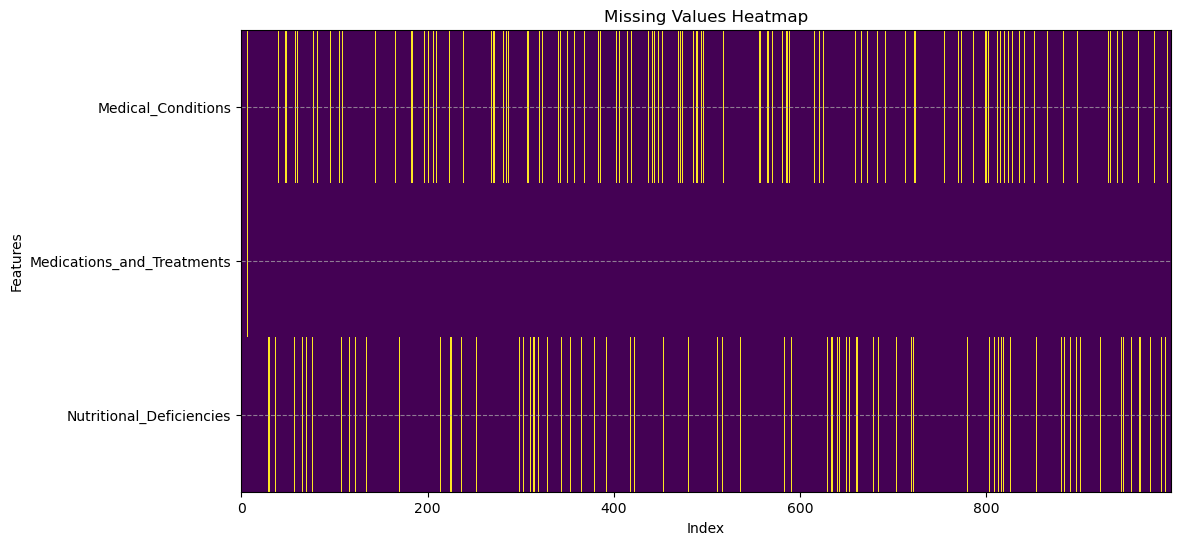

In [306]:
# Subset of columns to check
df_hair_data_subset = hair_data[["Medical_Conditions", "Medications_and_Treatments", "Nutritional_Deficiencies"]]

# Mask for NaNs and convert to int
nan_array = df_hair_data_subset.isna().astype(int).to_numpy()

plt.figure(figsize=(12, 6))

# Transpose to have features on y-axis, index on x-axis
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

plt.xlabel('Index')
plt.ylabel('Features')
plt.title('Missing Values Heatmap')

# Set y-axis labels
plt.yticks(range(len(df_hair_data_subset.columns)), df_hair_data_subset.columns)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >
From the heatmap, it looks like that data is MCAR. But, I will perform tests like Chi-squared to be sure if there is any hidden missingness relation.
Moreover, the missing pattern is the general pattern.
<br><br>

1) Because missing values for Medications and Treatments are only two, either we can either drop these rows or use the Simple Imputer from scikit learn. I have decided to drop these rows.
<br><br>

2) For the other two columns, Simple Imputer can't work, because it would just assign the most frequent value to the missing value, and I believe doing that for medical conditions and Medications adn Treatments will be very wrong.
</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will be computing the chi squared test and logistic regression to see if any there is any hidden pattern in the missing data.


</div>


In [307]:
hair_data['Medical_Conditions_missing'] = hair_data['Medical_Conditions'].isna().astype(int)
from scipy.stats import chi2_contingency

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Genetic_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Genetic Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Hormonal_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Hormonal Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Poor_Hair_Care_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Poor Hair Care Encoding) is likely due to chance: ",p)      

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Environmental_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Environmental Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Smoking_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Smoking Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Weight_Loss_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Weight Loss Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Stress_Level'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Stress Level) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Age_Range'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Age) is likely due to chance: ",p)




Probability that difference (Genetic Encoding) is likely due to chance:  0.15531140314549088
Probability that difference (Hormonal Encoding) is likely due to chance:  0.6197906062256153
Probability that difference (Poor Hair Care Encoding) is likely due to chance:  0.17723714030198537
Probability that difference (Environmental Encoding) is likely due to chance:  0.6041856375942578
Probability that difference (Smoking Encoding) is likely due to chance:  0.7843285087186818
Probability that difference (Weight Loss Encoding) is likely due to chance:  0.757052102543476
Probability that difference (Stress Level) is likely due to chance:  7.756396990821612e-17
Probability that difference (Age) is likely due to chance:  2.334615761670973e-23


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >
From the above results, we can see that:
<br><br>

- Probability that difference between the observed and expected missing medical conditions value due to Stress Level is 7.756396990821612e-17

- Probability that difference between the observed and expected missing medical conditions value due to Age is:  2.334615761670973e-23


Both of these values are less than 0.05, so we ignore the null hypothesis, and thus medical conditions is not MCAR, and probably MAR.


</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Moreover, I will do a logistic regression to check the p value when stress_levels are used to predict the the probability of the missing values.

In [308]:

X = (hair_data[['Weight_Loss_Encoding', 'Genetic_Encoding', 'Stress_Level']])
y = hair_data['Medical_Conditions_missing']

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.340052
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     Medical_Conditions_missing   No. Observations:                  999
Model:                                  Logit   Df Residuals:                      995
Method:                                   MLE   Df Model:                            3
Date:                        Sat, 18 Oct 2025   Pseudo R-squ.:                 0.01930
Time:                                12:46:06   Log-Likelihood:                -339.71
converged:                               True   LL-Null:                       -346.40
Covariance Type:                    nonrobust   LLR p-value:                  0.003895
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   

<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >
We can see that the p value for stress levels is very low (0.001), indicating that Stress_Level is statistically significant, meaning it has a real relationship with missingness of Medical_Conditions.

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will create pie charts based on the results of the Chi-squared tests to visualize the proportion of missing values in Medical_Conditions for both the observed and expected cases across Age_Range and Stress_Level.

In [309]:
contingency_stress_levels = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Stress_Level'])
chi2_sl, p_sl, dof_sl, ex_sl = chi2_contingency(contingency_stress_levels)

conitngency_age = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Age_Range'])
chi2_age, p_age, dof_age, ex_age = chi2_contingency(conitngency_age)

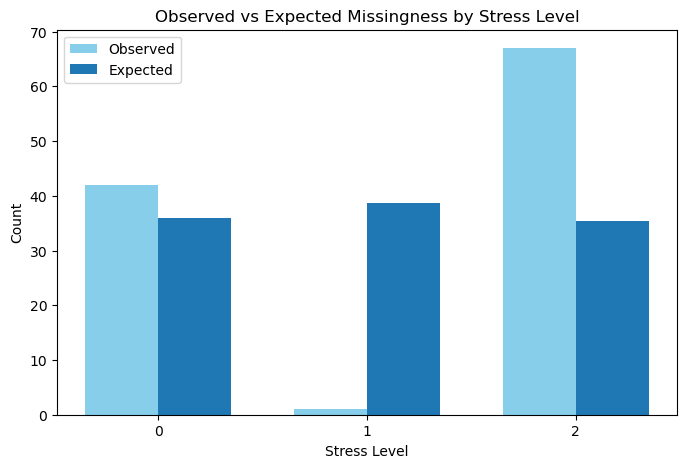

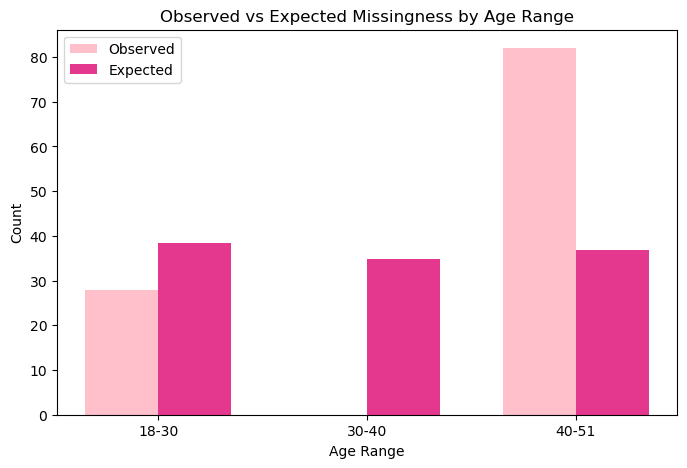

In [310]:
# --- Age Range ---
observed_stress = contingency_stress_levels.loc[1]
expected_stress = pd.Series(ex_sl[1], index=contingency_stress_levels.columns)

x = np.arange(len(observed_stress))  # positions
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, observed_stress, width, label='Observed', color='skyblue')
plt.bar(x + width/2, expected_stress, width, label='Expected')
plt.xticks(x, observed_stress.index)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Observed vs Expected Missingness by Stress Level')
plt.legend()
plt.show()

# --- Age Range ---
observed_age = conitngency_age.loc[1]
expected_age = pd.Series(ex_age[1], index=conitngency_age.columns)

x = np.arange(len(observed_age))  # positions
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, observed_age, width, label='Observed', color='pink')
plt.bar(x + width/2, expected_age, width, label='Expected', color='#E4388E')
plt.xticks(x, observed_age.index)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Observed vs Expected Missingness by Age Range')
plt.legend()
plt.show()

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will create two heatmaps in which the index will be sorted by Age and Stress respectively to show the MAR missingness in the medical conditions.

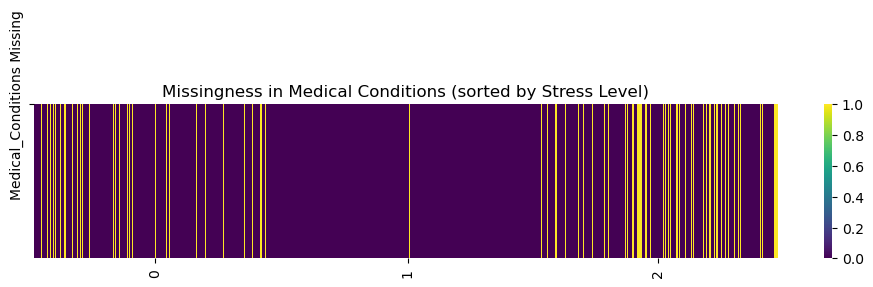

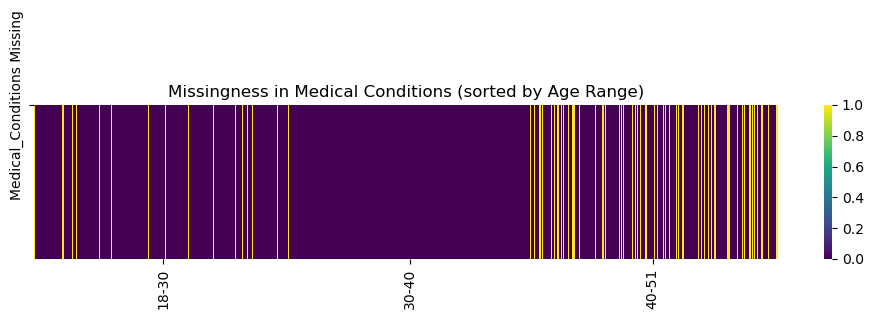

In [311]:
# --- Heatmap for Stress_Level ---
# Repeat each Stress_Level value as many times as there are rows in that category
stress_sorted = hair_data.sort_values('Stress_Level')
missing_stress_matrix = stress_sorted['Medical_Conditions_missing'].to_numpy().reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(missing_stress_matrix, cmap='viridis', cbar=True)
plt.xticks(
    ticks=[np.mean(np.where(stress_sorted['Stress_Level']==lvl)) for lvl in sorted(stress_sorted['Stress_Level'].unique())],
    labels=sorted(stress_sorted['Stress_Level'].unique())
)
plt.yticks([0], ['Medical_Conditions Missing'])
plt.title('Missingness in Medical Conditions (sorted by Stress Level)')
plt.show()

# --- Heatmap for Age_Range ---
age_sorted = hair_data.sort_values('Age_Range')
missing_age_matrix = age_sorted['Medical_Conditions_missing'].to_numpy().reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(missing_age_matrix, cmap='viridis', cbar=True)
plt.xticks(
    ticks=[np.mean(np.where(age_sorted['Age_Range']==lvl)) for lvl in age_sorted['Age_Range'].unique()],
    labels=age_sorted['Age_Range'].unique()
)
plt.yticks([0], ['Medical_Conditions Missing'])
plt.title('Missingness in Medical Conditions (sorted by Age Range)')
plt.show()


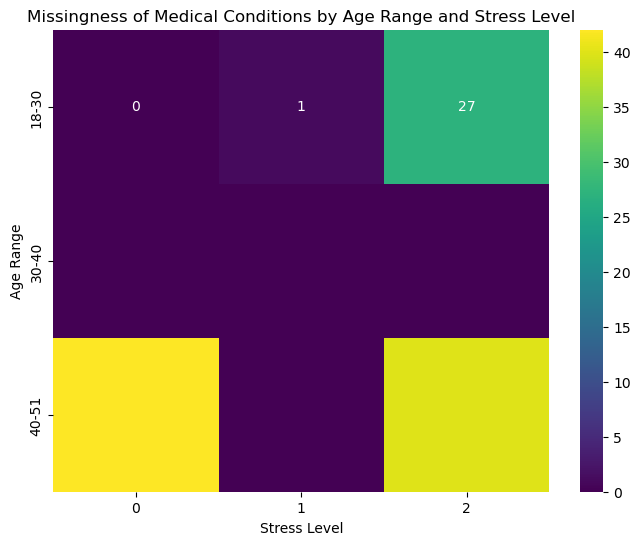

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure missingness column exists
hair_data['Medical_Conditions_missing'] = hair_data['Medical_Conditions'].isna().astype(int)

# Create a pivot table: rows = Age_Range, columns = Stress_Level, values = missing counts
pivot_table = hair_data.pivot_table(
    index='Age_Range',
    columns='Stress_Level',
    values='Medical_Conditions_missing',
    aggfunc='sum',  # count of missing values
    fill_value=0
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Stress Level')
plt.ylabel('Age Range')
plt.title('Missingness of Medical Conditions by Age Range and Stress Level')
plt.show()


In [313]:
grouped_counts = hair_data.groupby(['Stress_Level', 'Age_Range'], observed=True)['Medical_Conditions'] \
                          .value_counts() \
                          .unstack(fill_value=0)

print(grouped_counts)

Medical_Conditions      Alopecia Areata  Androgenetic Alopecia  Dermatitis  \
Stress_Level Age_Range                                                       
0            18-30                   11                     10          16   
             30-40                   16                      5          12   
             40-51                    8                      9           3   
1            18-30                   16                     14          14   
             30-40                   11                     15          13   
             40-51                   12                     16          13   
2            18-30                   15                     12           5   
             30-40                    9                      8           9   
             40-51                    9                      9           7   

Medical_Conditions      Dermatosis  Eczema  Psoriasis  Ringworm  \
Stress_Level Age_Range                                            
0      

In [314]:
before_counts = hair_data['Medical_Conditions'].copy()
before_counts[before_counts.isna()] = 'Missing'
before_counts = before_counts.value_counts().sort_index() 

In [315]:
print(hair_data['Nutritional_Deficiencies'])

0      Magnesium deficiency
1      Magnesium deficiency
2        Protein deficiency
3         Biotin Deficiency
4           Iron deficiency
               ...         
994    Vitamin A Deficiency
995      Protein deficiency
996      Protein deficiency
997       Biotin Deficiency
998    Vitamin D Deficiency
Name: Nutritional_Deficiencies, Length: 999, dtype: object


In [316]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

features = ['Stress_Level', 'Age_Range', 'Genetic_Encoding', 
            'Hormonal_Changes', 
            'Smoking', 'Weight_Loss', 'Environmental_Factors']

for col in features:
    if hair_data[col].dtype == 'object' or str(hair_data[col].dtype) == 'category':
        le = LabelEncoder()
        hair_data[col] = le.fit_transform(hair_data[col].astype(str))

df_known = hair_data[hair_data['Medical_Conditions'].notna()]
df_missing = hair_data[hair_data['Medical_Conditions'].isna()]

X_train = df_known[features]
y_train = df_known['Medical_Conditions']

X_missing = df_missing[features]

target_le = LabelEncoder()
y_train_encoded = target_le.fit_transform(y_train)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train_encoded)

preds_encoded = rf.predict(X_missing)
preds = target_le.inverse_transform(preds_encoded)

hair_data.loc[hair_data['Medical_Conditions'].isna(), 'Medical_Conditions'] = preds

print("Number of missing values after imputation:", hair_data['Medical_Conditions'].isna().sum())
print(hair_data['Medical_Conditions'].value_counts())


Number of missing values after imputation: 0
Medical_Conditions
Alopecia Areata          126
Androgenetic Alopecia    120
Psoriasis                117
Thyroid Problems         105
Seborrheic Dermatitis     99
Dermatosis                97
Dermatitis                93
Scalp Infection           86
Eczema                    78
Ringworm                  78
Name: count, dtype: int64


In [317]:
print(hair_data['Nutritional_Deficiencies'])

0      Magnesium deficiency
1      Magnesium deficiency
2        Protein deficiency
3         Biotin Deficiency
4           Iron deficiency
               ...         
994    Vitamin A Deficiency
995      Protein deficiency
996      Protein deficiency
997       Biotin Deficiency
998    Vitamin D Deficiency
Name: Nutritional_Deficiencies, Length: 999, dtype: object


In [318]:
# Saving in a new csv file
hair_data.to_csv('Data/Predict Hair Fall Cleaned.csv', index=False)

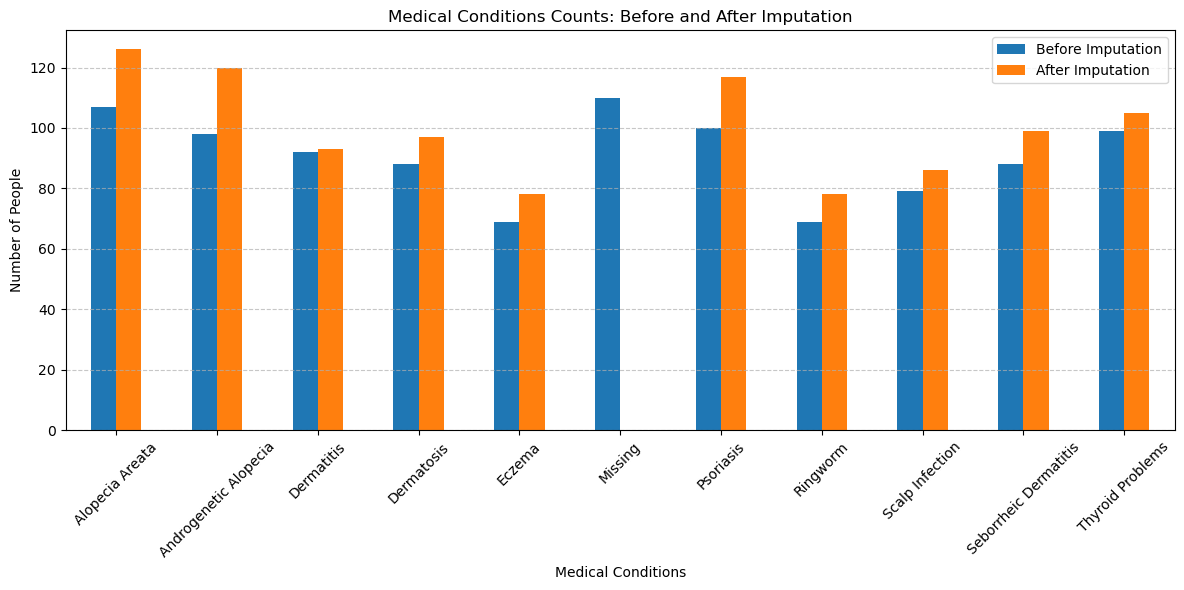

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Save original counts before imputation ---


# --- Step 2: Counts after imputation ---
after_counts = hair_data['Medical_Conditions'].value_counts().sort_index()

# --- Step 3: Combine into a dataframe for plotting ---
plot_df = pd.DataFrame({
    'Before Imputation': before_counts,
    'After Imputation': after_counts
}).fillna(0)

# --- Step 4: Plot ---
plot_df.plot(kind='bar', figsize=(12,6))
plt.title('Medical Conditions Counts: Before and After Imputation')
plt.ylabel('Number of People')
plt.xlabel('Medical Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
